In [116]:
import pandas as pd
from pandas import concat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

sys.path.append('./pre_processing.py')
from pre_processing import BTCUSD_Features

BTCUSD = BTCUSD_Features()
BTCUSD_df = BTCUSD.get_full_df()

X = []
y = []

BTCUSD_df = BTCUSD_df.drop("DOGEUSD", axis=1).drop("XRPUSD", axis=1).drop("Volume", axis=1)


No keys, only access to public API functions
2022-04-06 04:00:00 2022-09-19 20:00:00 steps left: 2194.039027777778
2022-09-19 20:00:00 2023-03-05 12:00:00 steps left: 1194.0390277777778
2023-03-05 12:00:00 2023-04-06 20:09:22 steps left: 194.03902777777785
No keys, only access to public API functions
2022-04-06 04:00:00 2022-09-19 20:00:00 steps left: 2194.039027777778
2022-09-19 20:00:00 2023-03-05 12:00:00 steps left: 1194.0390277777778
2023-03-05 12:00:00 2023-04-06 20:09:22 steps left: 194.03902777777785
No keys, only access to public API functions
2022-04-06 04:00:00 2022-09-19 20:00:00 steps left: 2194.039027777778
2022-09-19 20:00:00 2023-03-05 12:00:00 steps left: 1194.0390277777778
2023-03-05 12:00:00 2023-04-06 20:09:22 steps left: 194.03902777777785
No keys, only access to public API functions
2022-04-06 04:00:00 2022-09-19 20:00:00 steps left: 2194.039027777778
2022-09-19 20:00:00 2023-03-05 12:00:00 steps left: 1194.0390277777778
2023-03-05 12:00:00 2023-04-06 20:09:22 ste

In [117]:
training_length = int(np.ceil(BTCUSD_df.shape[0] * 0.9))
testing_length = int(BTCUSD_df.shape[0] - training_length)

training_df = BTCUSD_df.head(training_length)
testing_df = BTCUSD_df.tail(testing_length)

training_df = training_df.dropna()
testing_df = testing_df.dropna()

scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_df)


In [118]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
# Y_train


In [119]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(Dense(10))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 60, 50)            11600     
                                                                 
 dropout_40 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_41 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_41 (Dropout)        (None, 60, 60)            0         
                                                                 
 dense_11 (Dense)            (None, 60, 10)            610       
                                                                 
 lstm_42 (LSTM)              (None, 60, 80)            29120     
                                                                 
 dropout_42 (Dropout)        (None, 60, 80)          

In [120]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 40, batch_size =60, validation_split=0.1)

Epoch 1/40
29/29 [==============================] - 5s 106ms/step - loss: 0.0291 - val_loss: 0.0080
Epoch 2/40
29/29 [==============================] - 3s 99ms/step - loss: 0.0085 - val_loss: 0.0014
Epoch 3/40
29/29 [==============================] - 3s 99ms/step - loss: 0.0045 - val_loss: 0.0012
Epoch 4/40
29/29 [==============================] - 3s 102ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 5/40
29/29 [==============================] - 3s 110ms/step - loss: 0.0052 - val_loss: 6.9137e-04
Epoch 6/40
29/29 [==============================] - 3s 110ms/step - loss: 0.0039 - val_loss: 5.5286e-04
Epoch 7/40
29/29 [==============================] - 3s 108ms/step - loss: 0.0034 - val_loss: 9.8476e-04
Epoch 8/40
29/29 [==============================] - 3s 105ms/step - loss: 0.0037 - val_loss: 5.7678e-04
Epoch 9/40
29/29 [==============================] - 3s 105ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 10/40
29/29 [==============================] - 3s 111ms/step - loss: 0.0032 - va

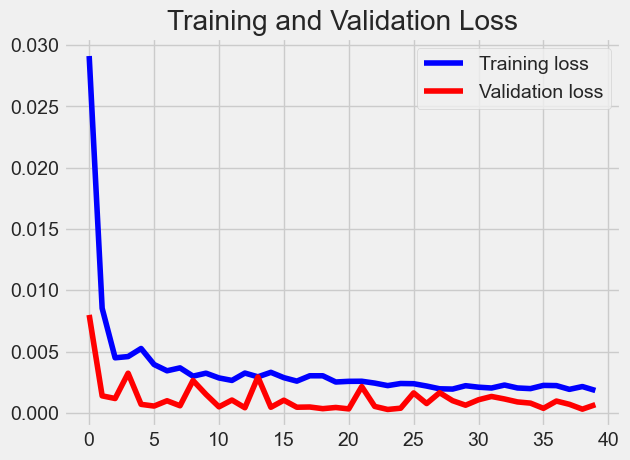

In [121]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [122]:
# Testing Set

# Get 60 candles of data prior to testing set for time series data
prior_60_candles = training_df.tail(60)
df= prior_60_candles.append(testing_df, ignore_index = True)

/var/folders/g9/0vssk50132s8z8kfs6tkmq600000gn/T/ipykernel_19084/1010332790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= prior_60_candles.append(testing_df, ignore_index = True)


In [209]:
transform_train = scaler.transform(df)

X_test = []
Y_test = []
for i in range (60, transform_train.shape[0]):
    X_test.append(transform_train[i-60:i]) 
    Y_test.append(transform_train[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test) 

X_test.shape, Y_test.shape
Y_pred = model.predict(X_test) 

Y_pred, Y_test

7/7 [==============================] - 0s 31ms/step


(array([[0.23231605],
        [0.23298256],
        [0.23425785],
        [0.23565868],
        [0.23692046],
        [0.23777053],
        [0.2380538 ],
        [0.23774241],
        [0.23702928],
        [0.23624042],
        [0.23492178],
        [0.23213   ],
        [0.22734474],
        [0.22069447],
        [0.21296659],
        [0.20510879],
        [0.19799778],
        [0.192327  ],
        [0.18846244],
        [0.18657956],
        [0.1865528 ],
        [0.18791926],
        [0.1903401 ],
        [0.19340192],
        [0.1966415 ],
        [0.19971517],
        [0.20235005],
        [0.20441258],
        [0.20580047],
        [0.2064408 ],
        [0.20636266],
        [0.205769  ],
        [0.20483556],
        [0.20359373],
        [0.20216376],
        [0.20064564],
        [0.19913626],
        [0.19775653],
        [0.19665208],
        [0.19582693],
        [0.19534895],
        [0.19507489],
        [0.19483998],
        [0.1945804 ],
        [0.19429624],
        [0

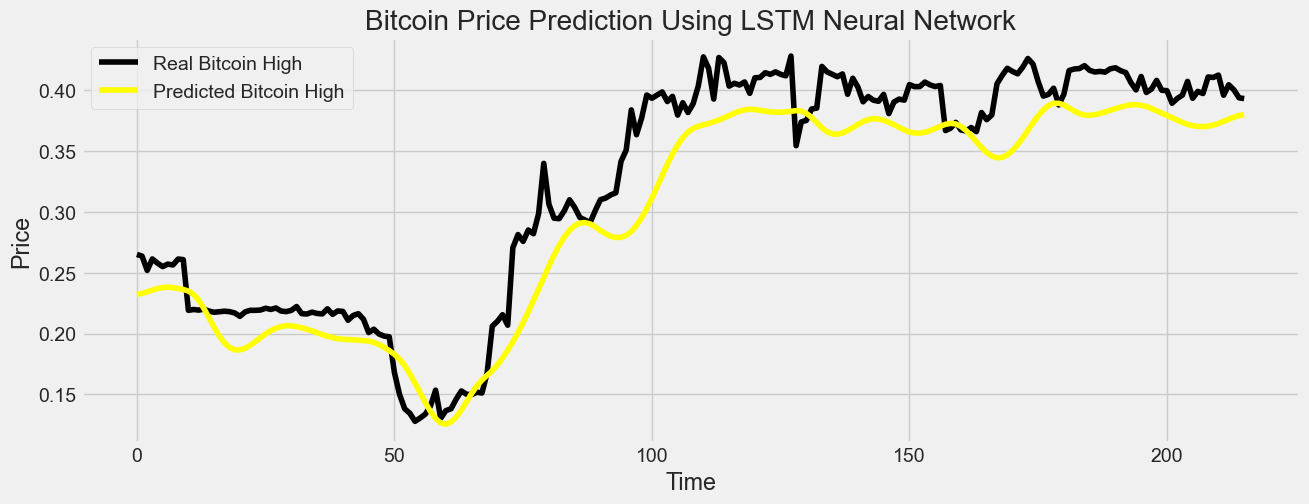

In [210]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'black', label = 'Real Bitcoin High')
plt.plot(Y_pred, color = 'yellow', label = 'Predicted Bitcoin High')
plt.title('Bitcoin Price Prediction Using LSTM Neural Network')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


[[2.14074883e+04 1.53170000e+04 1.53560000e+04 ... 2.17230000e+06
  1.53560000e+04 9.73770000e+02]
 [2.14249677e+04 1.53170000e+04 1.53560000e+04 ... 2.17230000e+06
  1.53560000e+04 9.73770000e+02]
 [2.14584120e+04 1.53170000e+04 1.53560000e+04 ... 2.17230000e+06
  1.53560000e+04 9.73770000e+02]
 ...
 [2.52227031e+04 1.53170000e+04 1.53560000e+04 ... 2.17230000e+06
  1.53560000e+04 9.73770000e+02]
 [2.52585340e+04 1.53170000e+04 1.53560000e+04 ... 2.17230000e+06
  1.53560000e+04 9.73770000e+02]
 [2.52789672e+04 1.53170000e+04 1.53560000e+04 ... 2.17230000e+06
  1.53560000e+04 9.73770000e+02]]


ValueError: Found input variables with inconsistent numbers of samples: [1914, 216]